# intellectual transient slicer

In [22]:
!which python # just to check you are in correct envyronment

/Users/Oilcake/opt/anaconda3/envs/slicer/bin/python


In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# standard imports
import os

# third-party imports
import aubio
import matplotlib.pyplot as plt
import librosa
import librosa.display

# local imports
from housekeeping.datahandling import makedir, get_files
from audiotools.analyze import find_onsets
from audiotools.note import Note
from audiotools.slicer import Slicer
from aubio import source

In [25]:
file = ('samples/OlnkIvnvnKck.aif')

In [26]:
sample = source(file, samplerate=0, hop_size=64)

In [27]:
sample.samplerate

88200

In [28]:
x, sr = librosa.load(file)
# samplerate = sr * 2 
# print('samplerate = ', samplerate)

In [29]:
type(x)

numpy.ndarray

In [30]:
onsets = find_onsets(file, threshold=0.6, window=128) # list of onsets in samples

looking for onsets in samples/OlnkIvnvnKck.aif


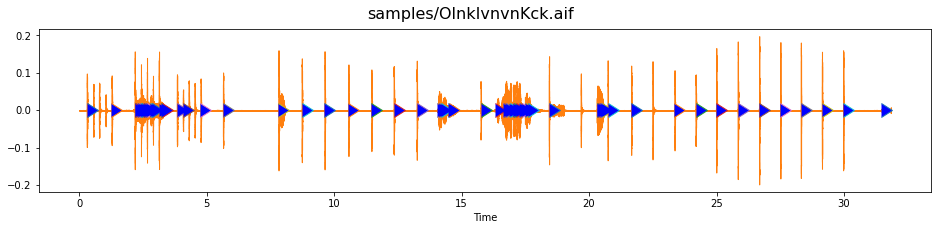

In [32]:
onsets = find_onsets(file, threshold=0.6, window=128) # list of onsets in samples
plt.figure(figsize=(16, 3))
plt.suptitle(str(file), fontsize=16)
for onset in onsets:
    onset_time = librosa.samples_to_time(onset, sr=sample.samplerate) # onset time from samples to ms
    plt.plot(onset_time, 0.0, marker=9, markerfacecolor='blue', markersize=14)

librosa.display.waveshow(x, sr=sr)
plt.show()